In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

In [84]:
options = {
    "model": "cfg/tiny-yolo-voc-kaufland.cfg", 
    "load": "darkflow_weights/tiny-yolo-voc.weights",
    "dataset": "data/ground_truth",
    "annotation": "data/ground_truth_xml",
    "labels": "labels.txt",
    "threshold": 0.1, 
    "gpu": 1.0,
    "train": True
}

In [85]:
tfnet = TFNet(options)

Parsing ./cfg/tiny-yolo-voc.cfg
Parsing cfg/tiny-yolo-voc-kaufland.cfg
Loading darkflow_weights/tiny-yolo-voc.weights ...
Successfully identified 63471556 bytes
Finished in 0.007978200912475586s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | co

In [ ]:
tfnet.train()


cfg/tiny-yolo-voc-kaufland.cfg parsing data/ground_truth_xml
Parsing for ['label_00015907', '00070845', '00062396', 'label_00062396', 'label_00062541', 'label_00062559', '03001211', '00049378', '02802511', 'label_00050887', 'label_00062434', '00060691', 'label_00015905', 'label_00062390', '00062393', '03001220', 'label_00062397', 'label_03100931', '00066417', '00014561', 'label_00057855', '00062447', 'label_00052560', '00052557', 'label_00062412', 'label_00049295', 'label_02802511', '00049294', '00052559', '00069582', 'label_00050965', '00073709', '00057856', '00062538', 'label_00060668', 'label_00073709', '00069581', 'label_00070844', '02802507', 'label_00014557', 'label_00052558', '00062395', '00062413', '00053853', 'label_00062394', '00030448', 'label_00049296', 'label_00062538', 'label_00073597', '00052555', 'label_03001220', '00011325', '00049296', '00032190', 'label_00020162', 'label_02802510', 'label_00030453', 'label_00052557', 'label_00073675', '00052558', 'label_00052559', '

In [78]:
def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.12:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

In [79]:
import pprint as pp

original_img = cv2.imread("./sample_img/kaufland_test.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)

pp.pprint(results)

[{'bottomright': {'x': 921, 'y': 151},
  'confidence': 0.10306701,
  'label': '03001210',
  'topleft': {'x': 126, 'y': 0}},
 {'bottomright': {'x': 921, 'y': 275},
  'confidence': 0.11555093,
  'label': '03001210',
  'topleft': {'x': 402, 'y': 0}},
 {'bottomright': {'x': 921, 'y': 470},
  'confidence': 0.10772217,
  'label': '03001210',
  'topleft': {'x': 237, 'y': 220}},
 {'bottomright': {'x': 532, 'y': 691},
  'confidence': 0.13816158,
  'label': '03001210',
  'topleft': {'x': 0, 'y': 455}},
 {'bottomright': {'x': 782, 'y': 378},
  'confidence': 0.1024636,
  'label': 'label_03001210',
  'topleft': {'x': 716, 'y': 307}},
 {'bottomright': {'x': 424, 'y': 546},
  'confidence': 0.10125163,
  'label': 'label_03001210',
  'topleft': {'x': 214, 'y': 352}},
 {'bottomright': {'x': 921, 'y': 521},
  'confidence': 0.10192624,
  'label': 'label_03001210',
  'topleft': {'x': 666, 'y': 386}},
 {'bottomright': {'x': 921, 'y': 691},
  'confidence': 0.11393001,
  'label': 'label_03001210',
  'topleft'

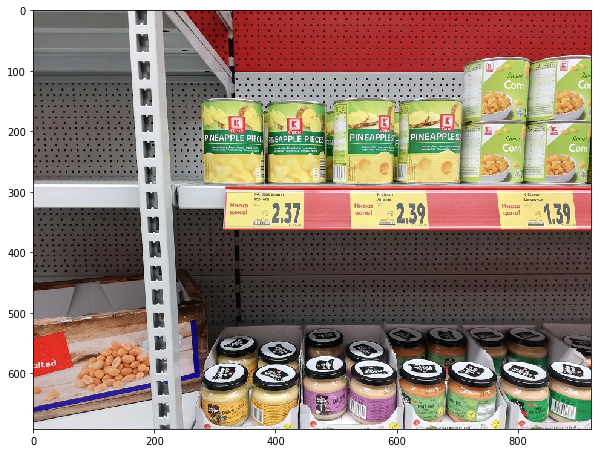

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(original_img)

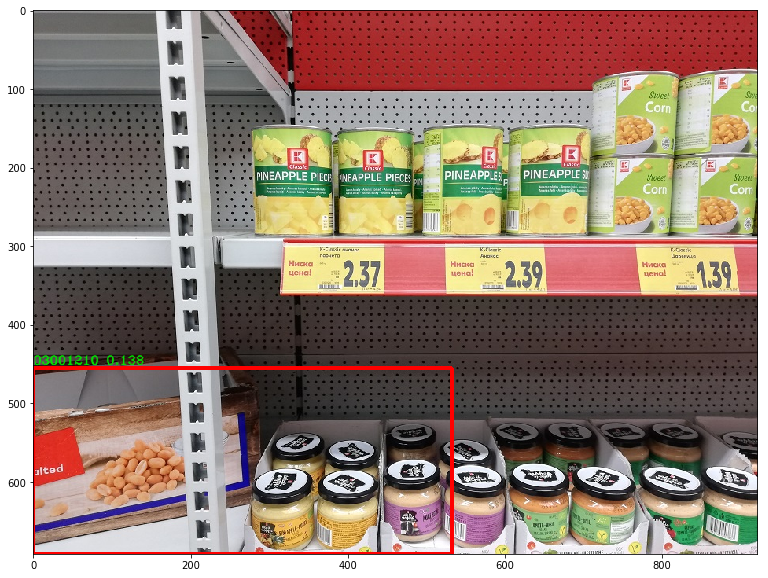

In [80]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

In [ ]:
tfnet.train

In [ ]:
tfnet.